In [239]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor


import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
wine_data = pd.read_csv('Dataset/winequality-white.csv', sep=';')
red_wine = pd.read_csv('Dataset/winequality-red.csv', sep=';')
sns.set(style='whitegrid', context='notebook', font_scale=1)

In [53]:
wine_data.append(red_wine)
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


/usr/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


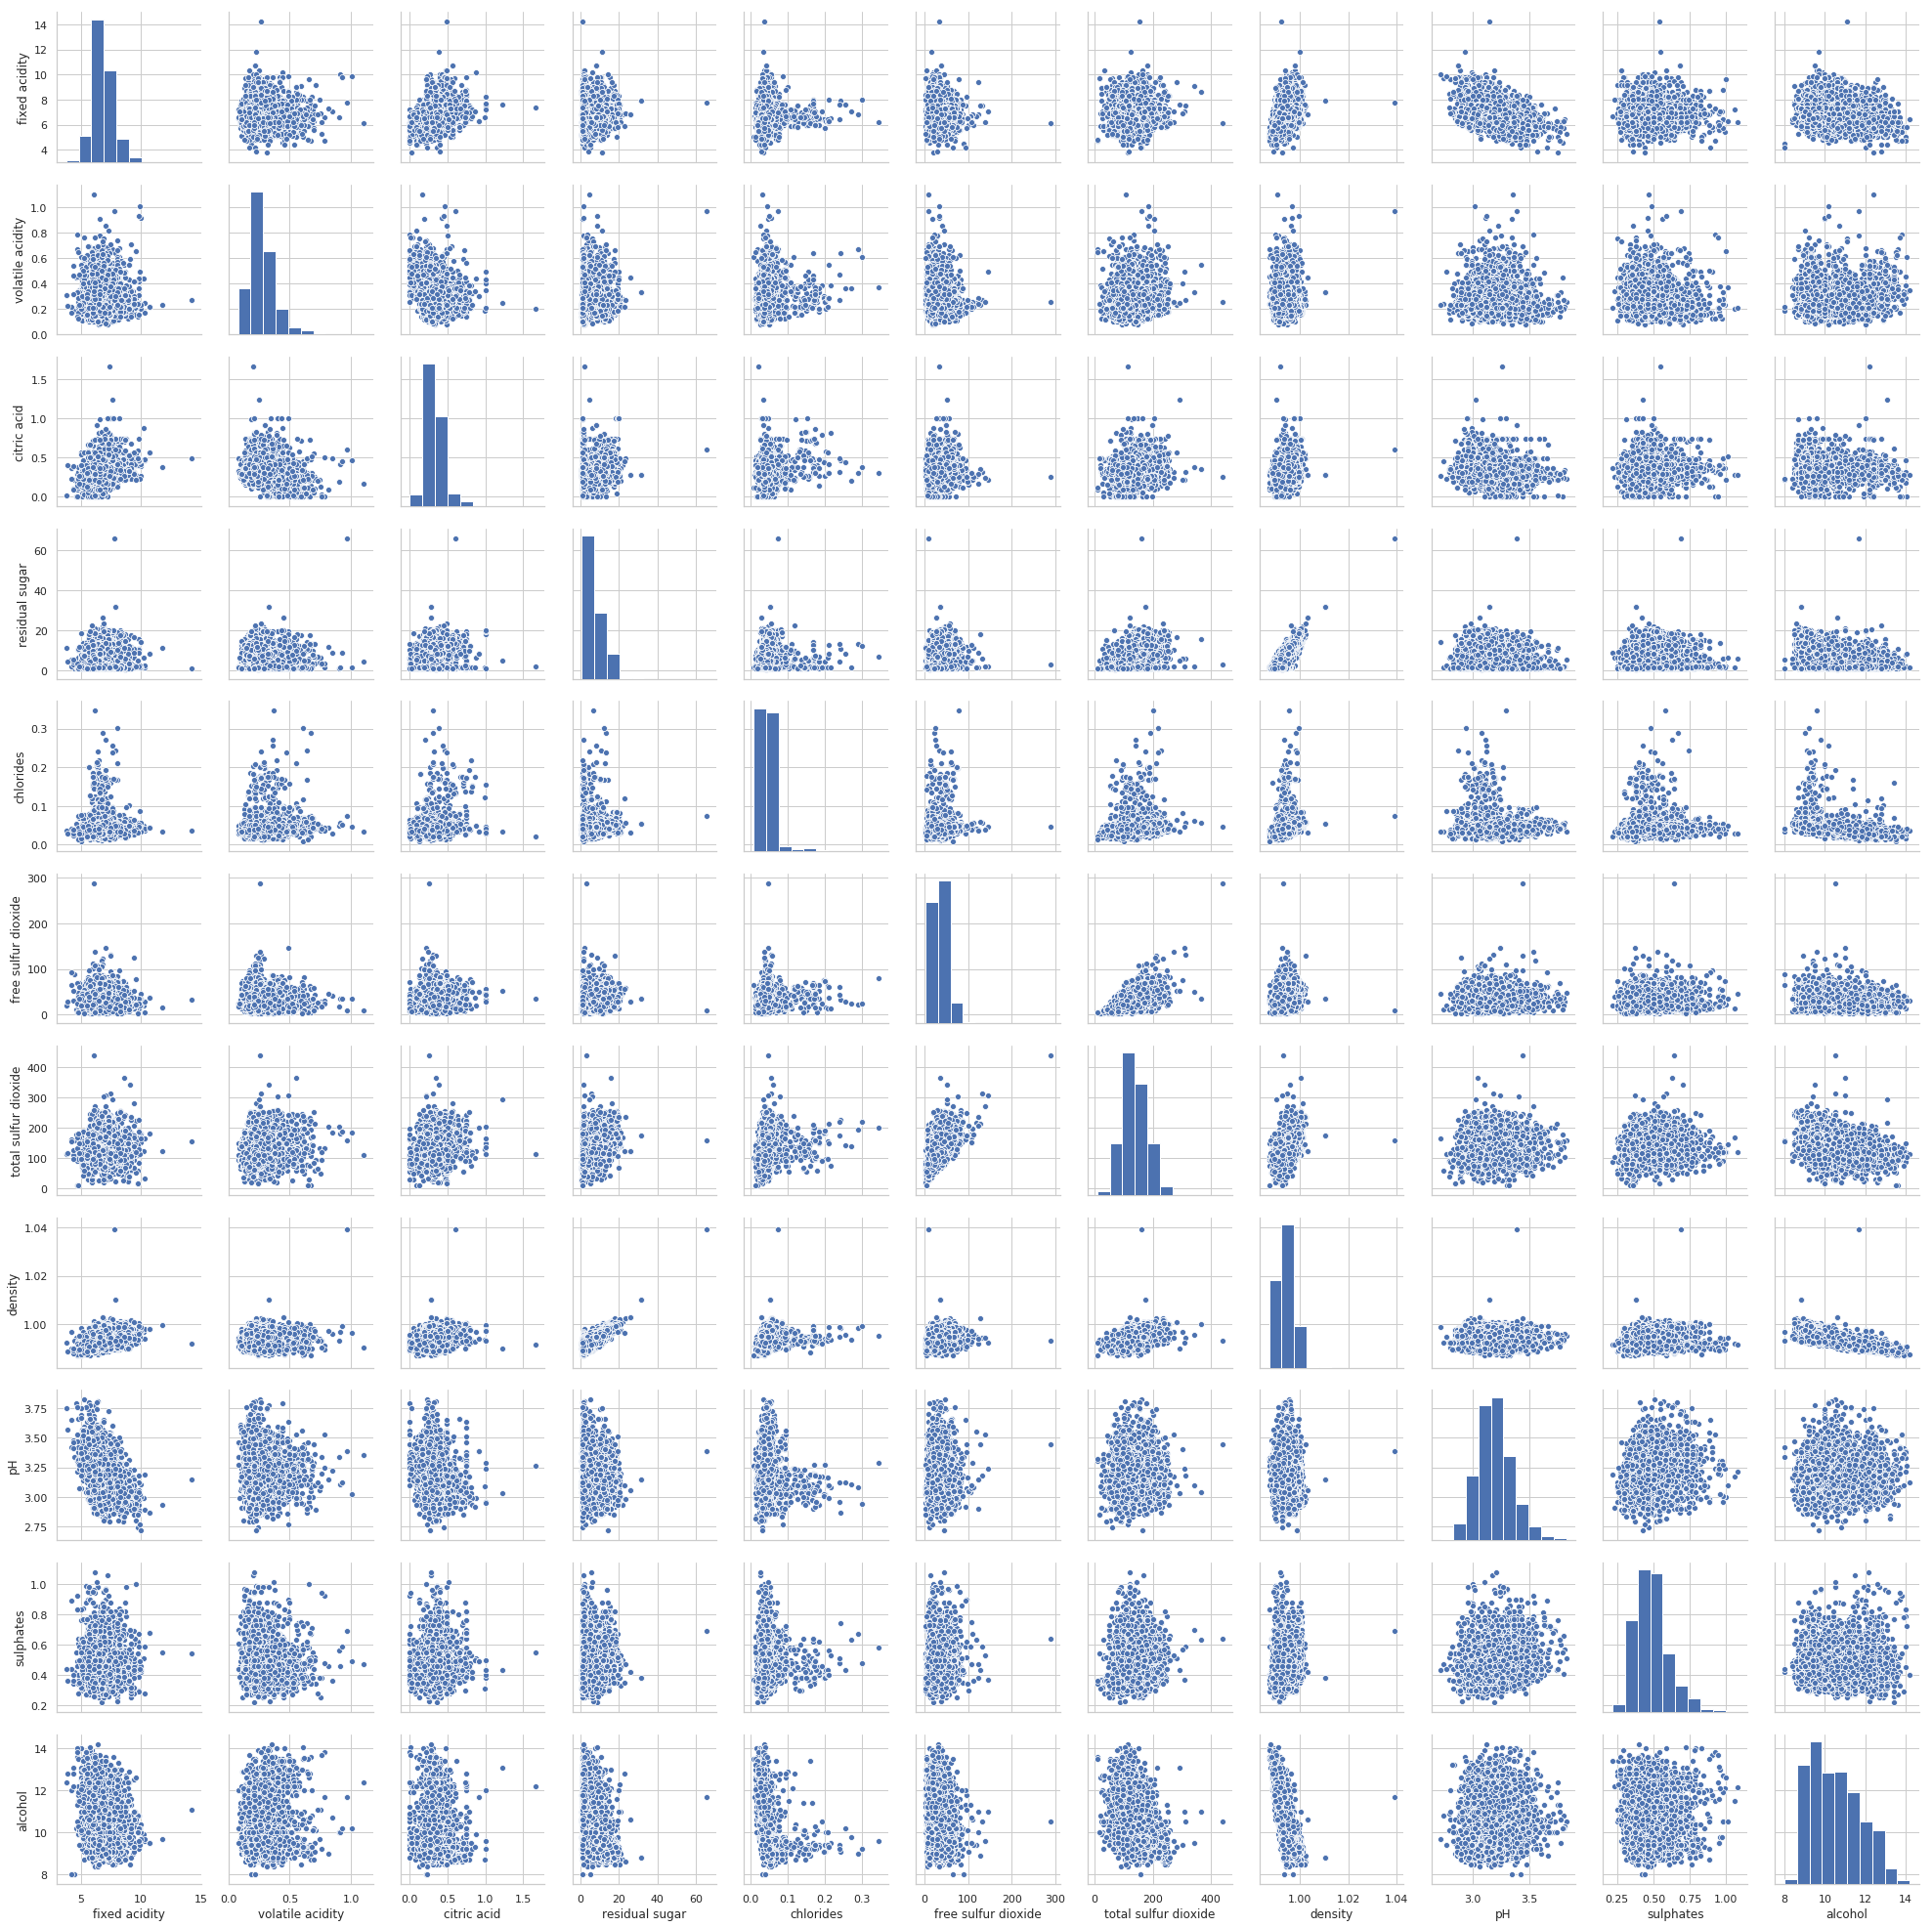

In [32]:
sns.pairplot(wine_data.iloc[:,:11], size=2.5)

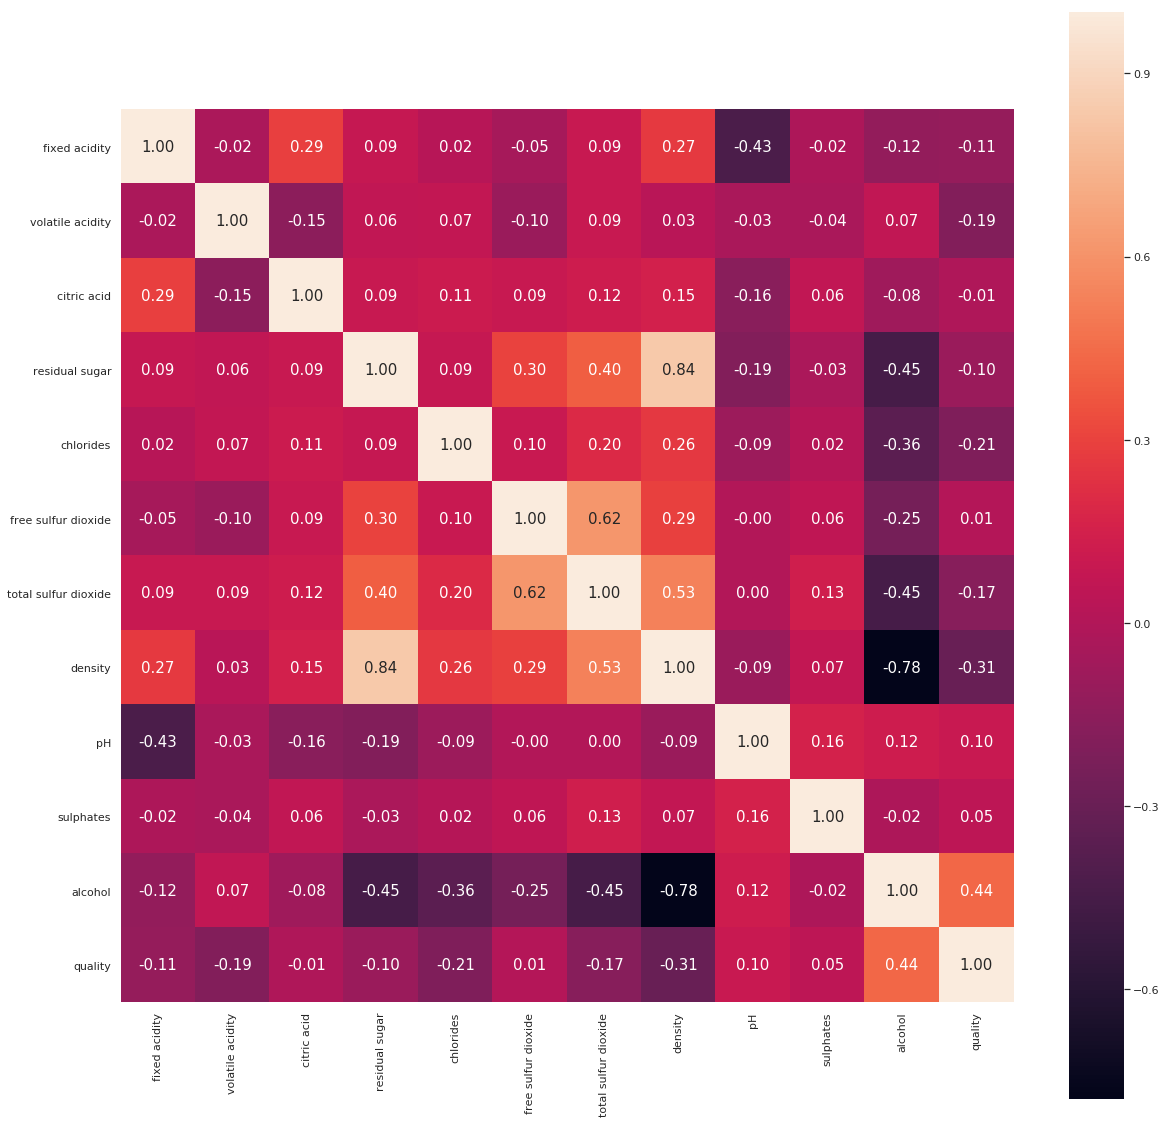

In [30]:
cm = np.corrcoef(wine_data.values.T)
plt.figure(figsize=(20,20))
hm = sns.heatmap(cm, cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size':15}, 
                 yticklabels=wine_data.columns.values, 
                 xticklabels=wine_data.columns.values)
plt.show()

In [220]:
class  LinearRegressionGD(object):

    def __init__(self, eta=0.000001, n_iter=600):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            print("Cost at step ", i, " is: ", cost)
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

(4898, 1)
(4898,)
(4898, 1)
(4898,)
Cost at step  0  is:  2449.0
Cost at step  1  is:  2432.15535499795
Cost at step  2  is:  2415.475316028501
Cost at step  3  is:  2398.9582745599237
Cost at step  4  is:  2382.602637779075
Cost at step  5  is:  2366.406828437797
Cost at step  6  is:  2350.369284700817
Cost at step  7  is:  2334.488459995131
Cost at step  8  is:  2318.7628228608614
Cost at step  9  is:  2303.1908568035715
Cost at step  10  is:  2287.7710601480217
Cost at step  11  is:  2272.501945893358
Cost at step  12  is:  2257.3820415697137
Cost at step  13  is:  2242.4098890962105
Cost at step  14  is:  2227.5840446403513
Cost at step  15  is:  2212.9030784787833
Cost at step  16  is:  2198.3655748594247
Cost at step  17  is:  2183.970131864937
Cost at step  18  is:  2169.715361277529
Cost at step  19  is:  2155.599888445091
Cost at step  20  is:  2141.6223521486227
Cost at step  21  is:  2127.7814044709726
Cost at step  22  is:  2114.075710666846
Cost at step  23  is:  2100.5039

Cost at step  599  is:  730.0421817586289


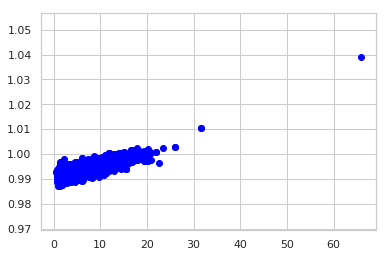

In [254]:
X = wine_data[['residual sugar']].values
y = wine_data['density'].values

print(X.shape)
print(y.shape)
sc_X = StandardScaler()
X_std = sc_x.fit_transform(X)
Y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
print(X_std.shape)
print(Y_std.shape)

plt.scatter(X, y, c='blue')

lr = LinearRegressionGD()
lr.fit(X_std, Y_std)
plt.show()

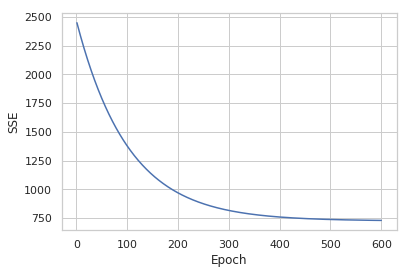

In [222]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
# plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [223]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return None


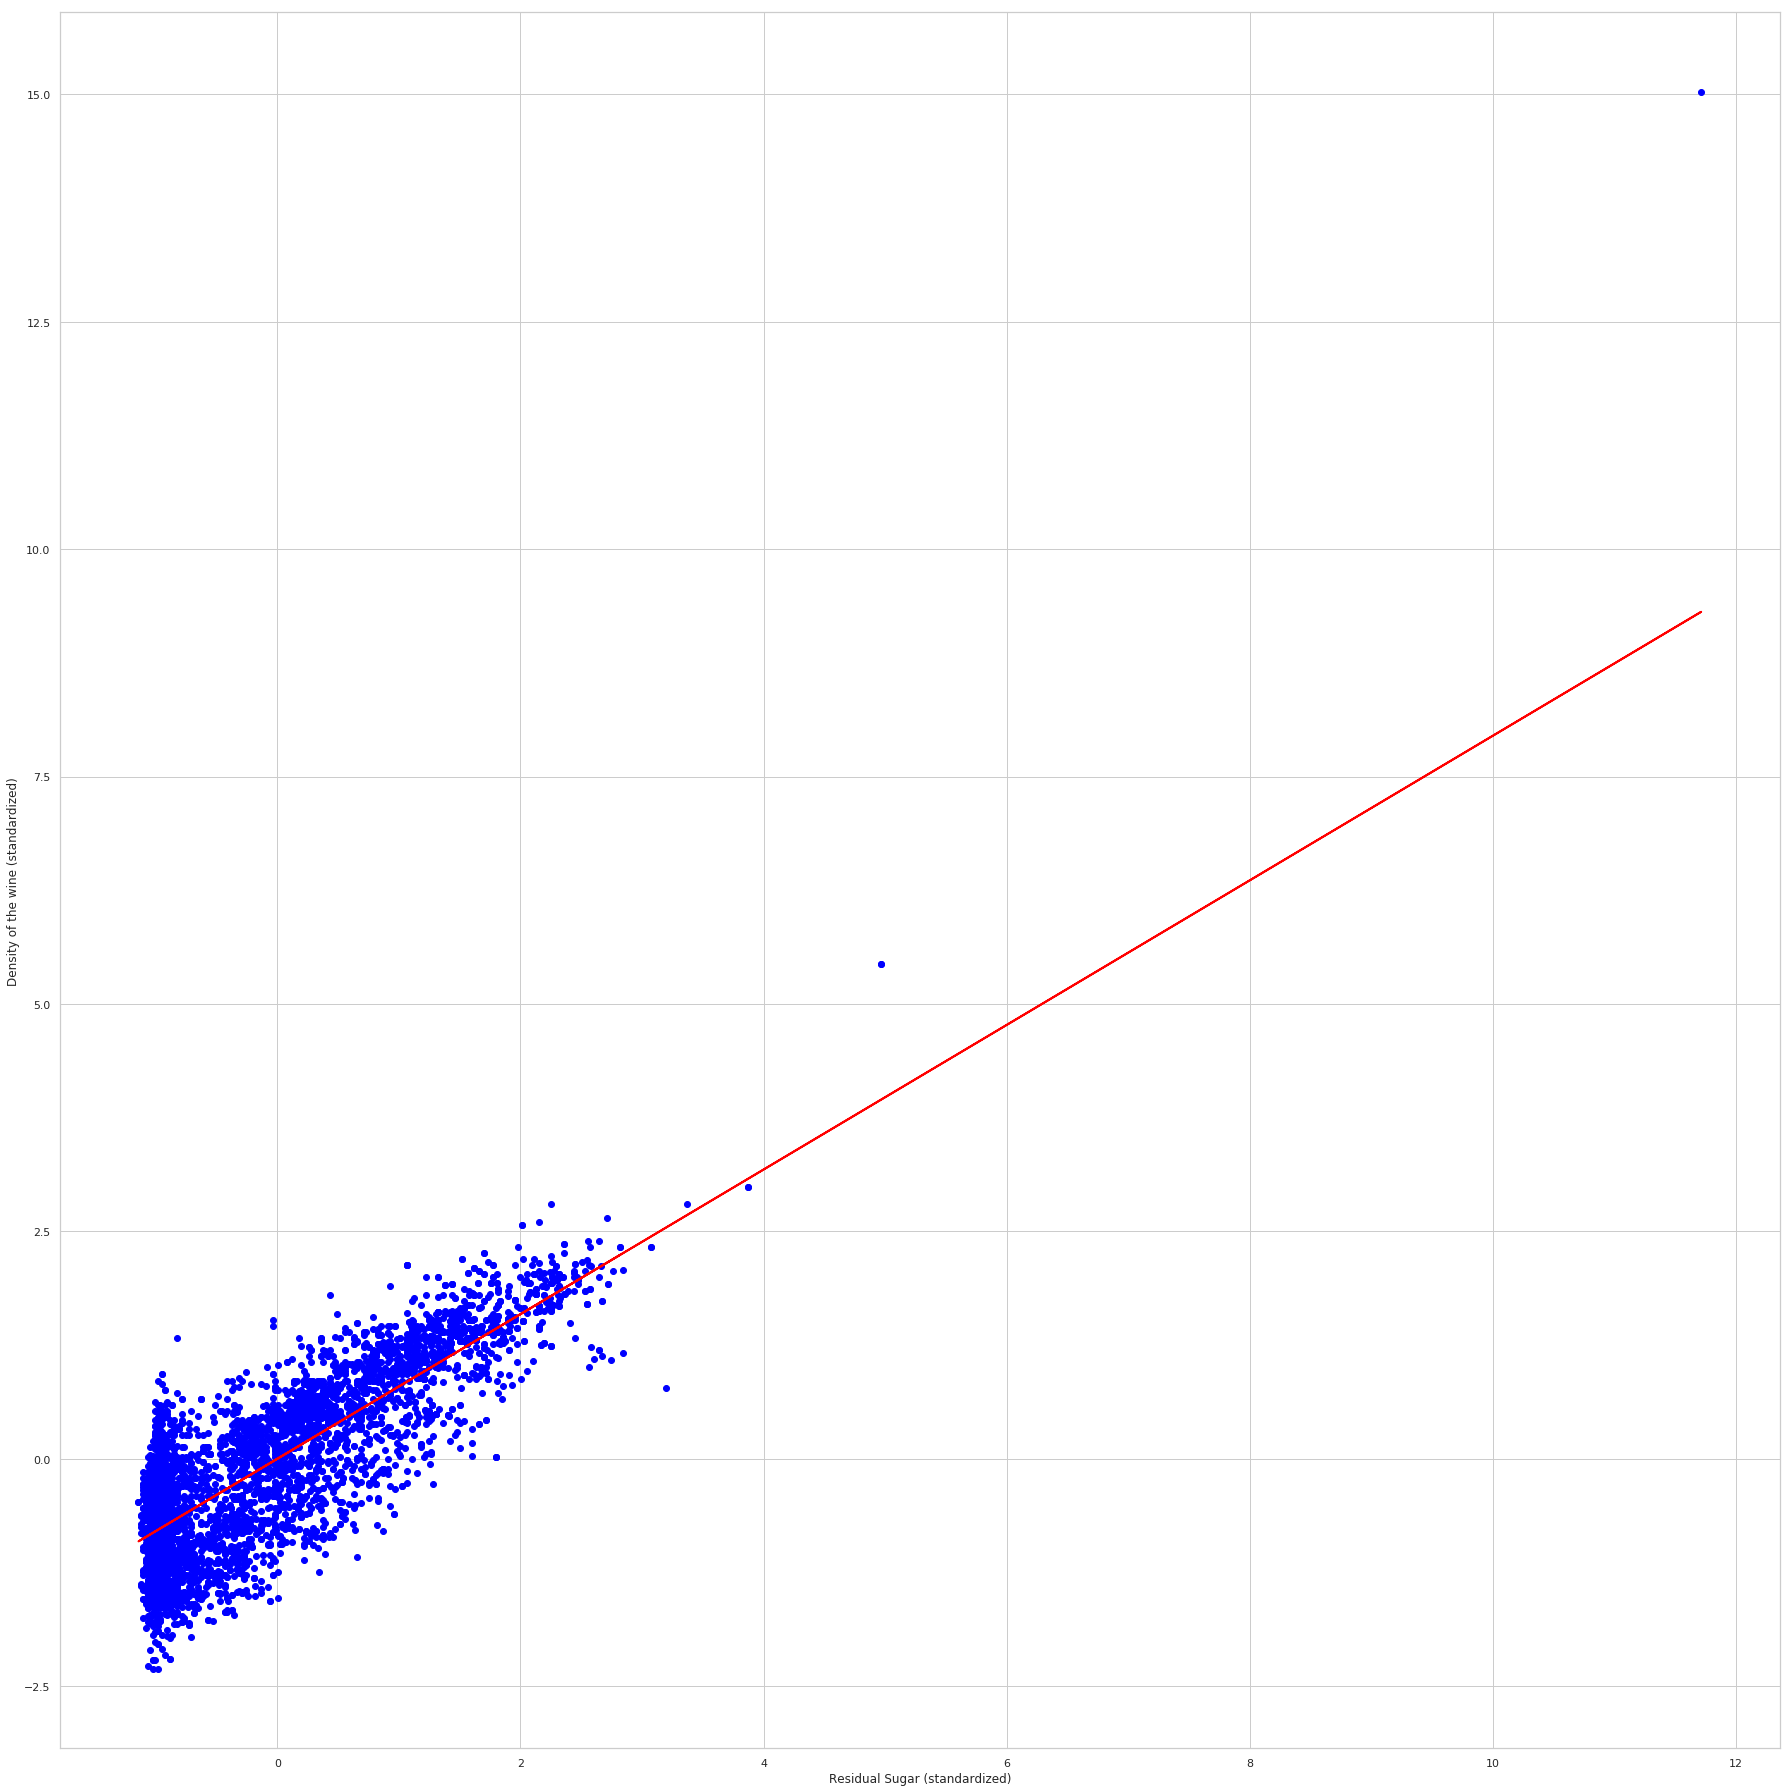

In [228]:
plt.figure(figsize=(25,25))
lin_regplot(X_std, Y_std, lr)
plt.xlabel('Residual Sugar (standardized)')
plt.ylabel('Density of the wine (standardized)')
plt.tight_layout()
plt.show()

In [261]:
X = wine_data[['total sulfur dioxide']].values
y = wine_data['density'].values

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.7f' %slr.coef_[0])
print('Intercept: %.7f' %slr.intercept_)

Slope: 0.0000373
Intercept: 0.9888677


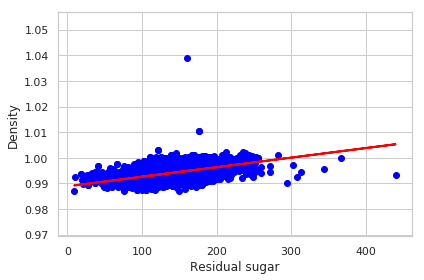

In [262]:
lin_regplot(X, y, slr)
plt.xlabel('Residual sugar')
plt.ylabel('Density')
plt.tight_layout()
# plt.savefig('./figures/scikit_lr_fit.png', dpi=300)
plt.show()

In [263]:
# adding a column vector of "ones"# adding 
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print('Slope: %.7f' % w[1])
print('Intercept: %.7f' % w[0])

Slope: 0.0000373
Intercept: 0.9888677


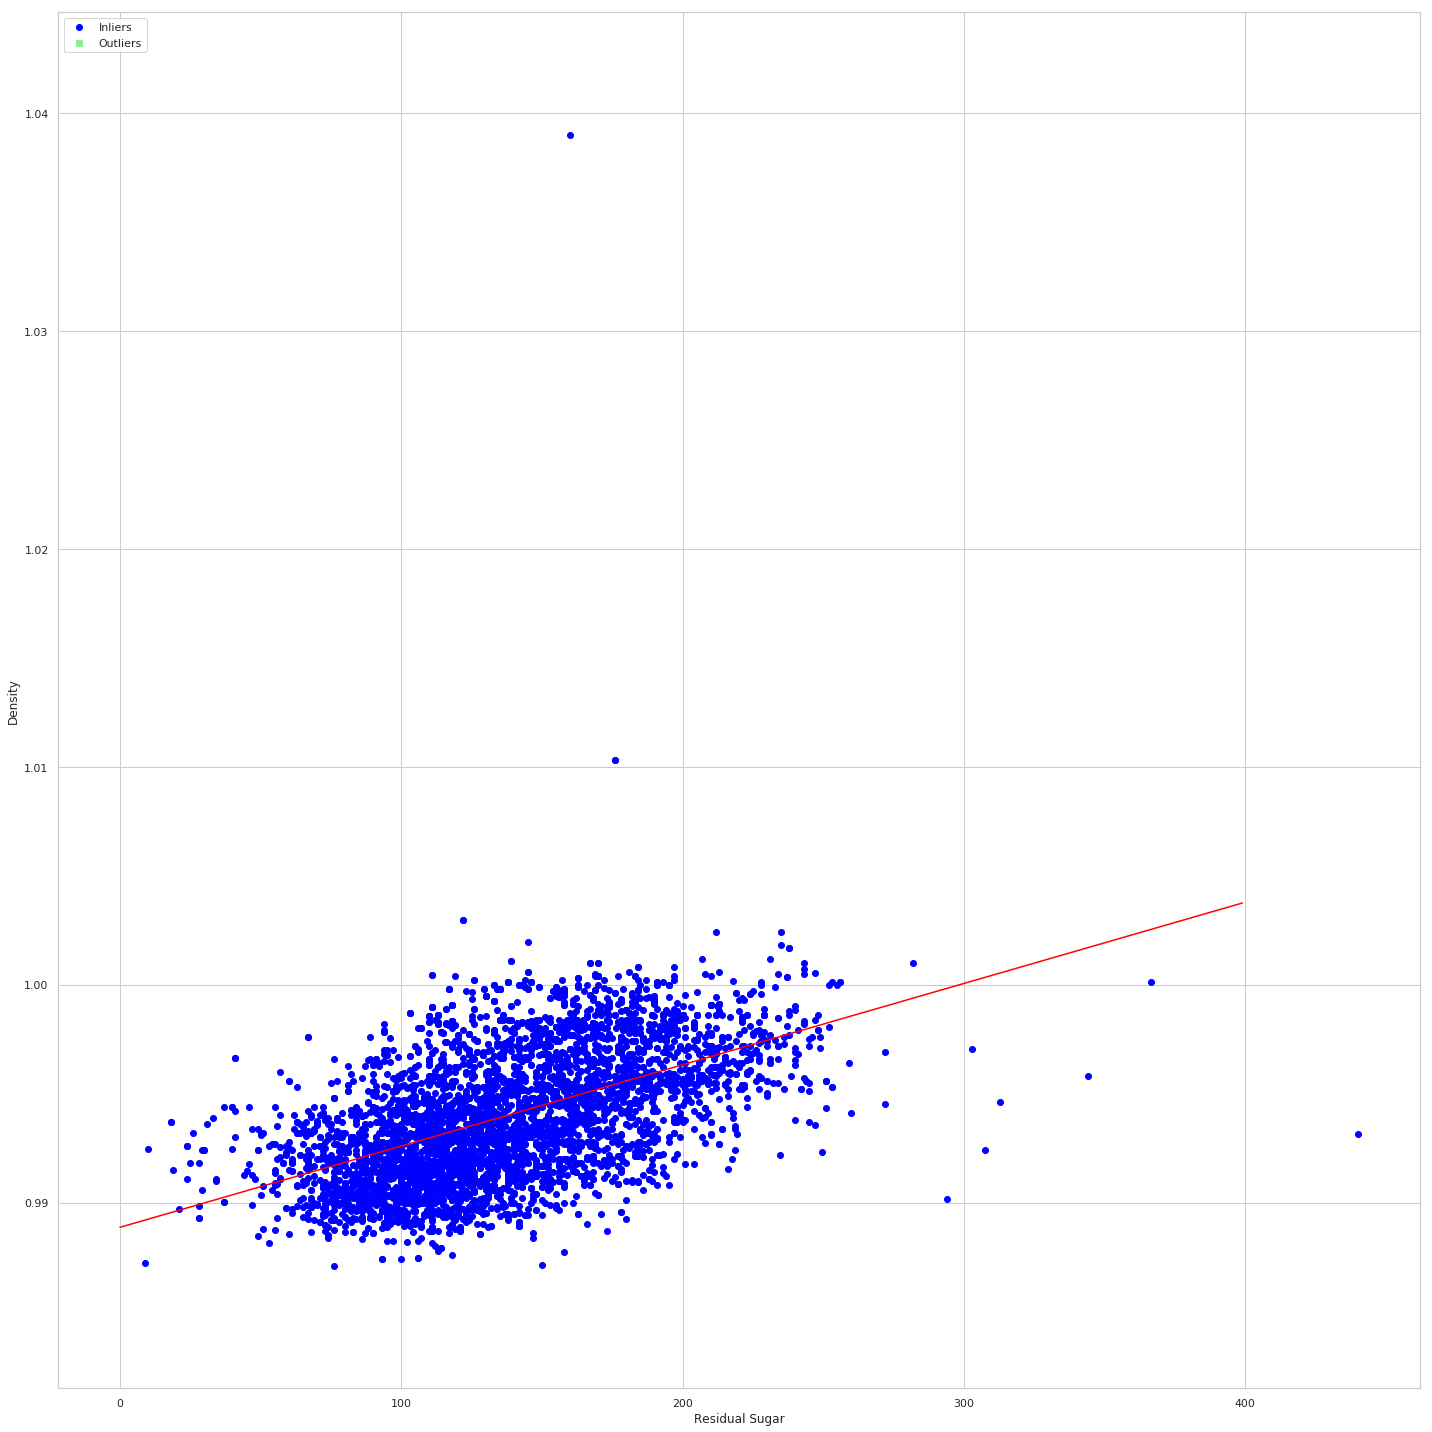

In [276]:
X = wine_data[['total sulfur dioxide']].values
y = wine_data['density'].values

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=1000, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         residual_threshold=5.0, 
                         random_state=0)

ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(0, 400, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

plt.figure(figsize=(20, 20))
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')   
plt.xlabel('Residual Sugar')
plt.ylabel('Density')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [273]:
print('Slope: %.7f' % ransac.estimator_.coef_[0])
print('Intercept: %.7f' % ransac.estimator_.intercept_)

Slope: 0.0000373
Intercept: 0.9888677
